### Machine Learning

In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data_url = "https://drive.google.com/uc?export=download&id=1BvQRvWXdbpXpOaSahEMovATmKQuQilQa"
ans= pd.read_csv(data_url)

In [4]:
ans.head()

,Datetime,SMA
0,2018-01-01 04:34:10.320672,6864.691463
1,2018-01-01 12:37:36.596064,6864.689664
2,2018-01-01 20:31:55.898112,6864.688585
3,2018-01-02 05:42:49.014720,6864.684927
4,2018-01-02 12:13:01.263360,6864.682858


In [5]:
ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  2291 non-null   object 
 1   SMA       2291 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.9+ KB


In [6]:
# Correct column name if necessary
ans.rename(columns={'Datetime': 'DateTime'}, inplace=True)

In [7]:
# Convert DateTime column to datetime type
ans['DateTime'] = pd.to_datetime(ans['DateTime'])


In [8]:
# Sort data by DateTime
ans = ans.sort_values('DateTime')

In [9]:
# Calculate the rate of change in SMA
ans['SMA_change'] = ans['SMA'].diff().abs()


In [10]:
# Determine a threshold for SMA change to identify maneuvers
threshold = ans['SMA_change'].mean() + 3 * ans['SMA_change'].std()

In [11]:
# Create labels for maneuvers based on the heuristic
ans['Maneuver'] = (ans['SMA_change'] > threshold).astype(int)

In [12]:
# Drop rows with NaN values resulting from the diff() operation
ans = ans.dropna().reset_index(drop=True)

In [13]:
# Feature engineering: Using SMA and SMA_change as features
features = ans[['SMA', 'SMA_change']]
labels = ans['Maneuver']

In [14]:
# Ensure features and labels are of the same length
assert len(features) == len(labels) #Features and labels must be of the same length"

In [15]:
from sklearn.impute import SimpleImputer
# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
features = imputer.fit_transform(features)

In [16]:
# Ensure features and labels are of the same length
assert len(features) == len(labels) #"Features and labels must be of the same length after imputation"

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [18]:
# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Predict on the test set
y_pred = model.predict(X_test)

In [20]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       455
           1       1.00      0.33      0.50         3

    accuracy                           1.00       458
   macro avg       1.00      0.67      0.75       458
weighted avg       1.00      1.00      0.99       458

Confusion Matrix:
[[455   0]
 [  2   1]]


In [21]:
# Predict on the entire dataset to visualize results
ans['Predicted_Maneuver'] = model.predict(features)

In [24]:
from sklearn.metrics import accuracy_score

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


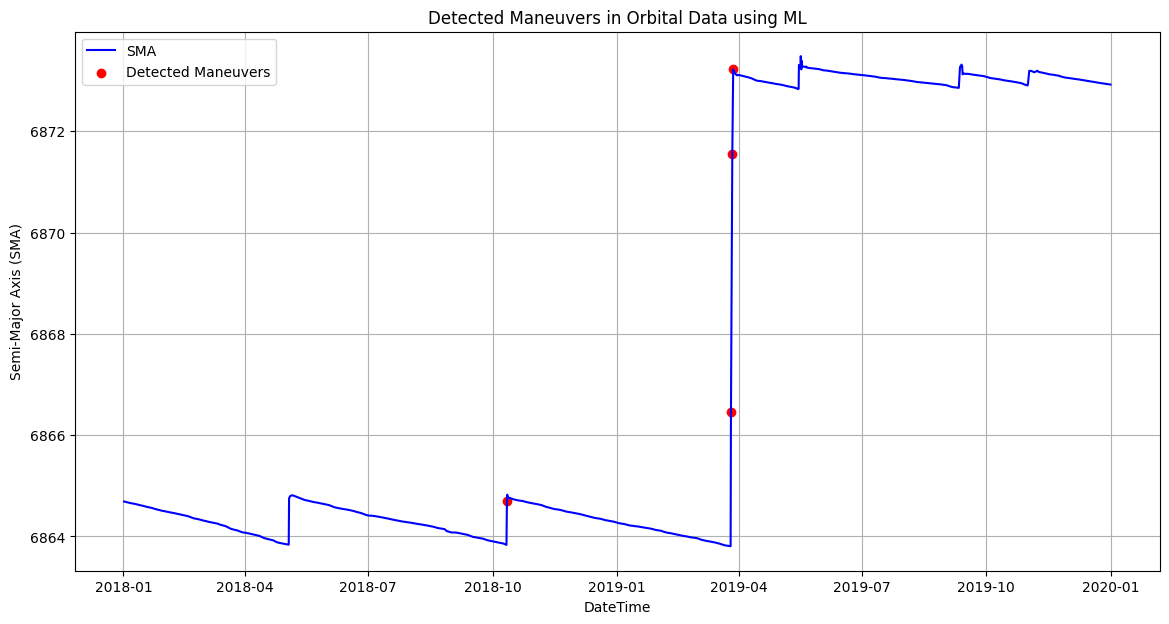

In [25]:
# Visualization
plt.figure(figsize=(14, 7))
plt.plot(ans['DateTime'], ans['SMA'], label='SMA', color='blue')
plt.scatter(ans[ans['Predicted_Maneuver'] == 1]['DateTime'], ans[ans['Predicted_Maneuver'] == 1]['SMA'], color='red', label='Detected Maneuvers')
plt.xlabel('DateTime')
plt.ylabel('Semi-Major Axis (SMA)')
plt.title('Detected Maneuvers in Orbital Data using ML')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
potential_maneuvers = ans[ans['Predicted_Maneuver']==1]['DateTime']
print("Dates/Times of Potential Maneuvers:")
print(potential_maneuvers)

Dates/Times of Potential Maneuvers:
870    2018-10-11 13:37:04.556640
1420   2019-03-26 04:53:33.243936
1421   2019-03-27 04:34:36.436800
1422   2019-03-27 20:25:37.599168
Name: DateTime, dtype: datetime64[ns]


###Heuristic approach

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
data_url = "https://drive.google.com/uc?export=download&id=1BvQRvWXdbpXpOaSahEMovATmKQuQilQa"
df = pd.read_csv(data_url)


In [29]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [30]:
df = df.sort_values('Datetime').reset_index(drop=True)

In [31]:
df['SMA_diff'] = df['SMA'].diff().fillna(0)

threshold = 3 * df['SMA_diff'].std()

df['Potential_Maneuver'] = (abs(df['SMA_diff']) > threshold).astype(int)

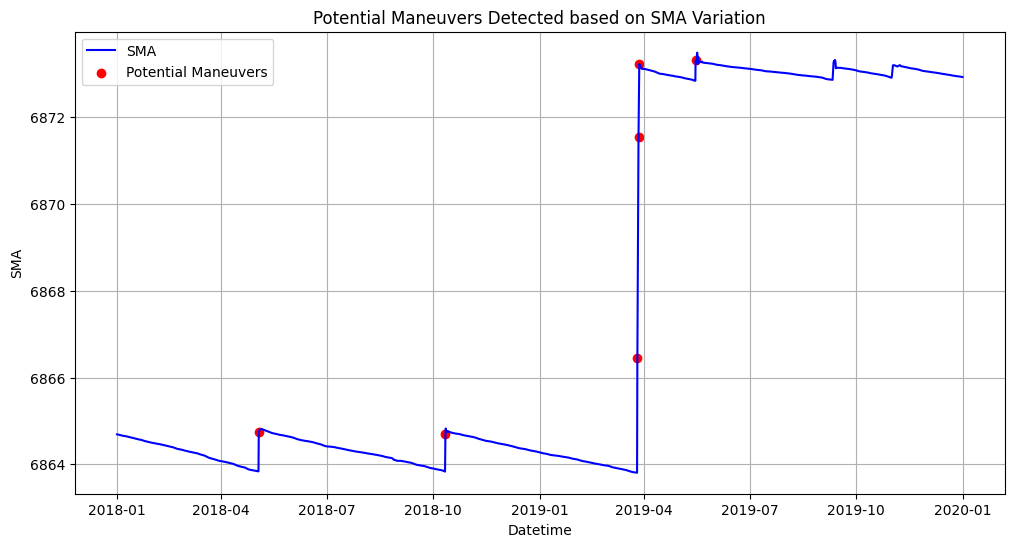

Dates/Times of Potential Maneuvers:
384    2018-05-03 12:01:31.056960
871    2018-10-11 13:37:04.556640
1421   2019-03-26 04:53:33.243936
1422   2019-03-27 04:34:36.436800
1423   2019-03-27 20:25:37.599168
1583   2019-05-15 10:44:36.864096
Name: Datetime, dtype: datetime64[ns]


In [32]:
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df['SMA'], label='SMA', color='blue')
plt.scatter(df[df['Potential_Maneuver'] == 1]['Datetime'], df[df['Potential_Maneuver'] == 1]['SMA'], color='red', label='Potential Maneuvers')
plt.xlabel('Datetime')
plt.ylabel('SMA')
plt.title('Potential Maneuvers Detected based on SMA Variation')
plt.legend()
plt.grid(True)
plt.show()
potential_maneuvers = df[df['Potential_Maneuver'] == 1]['Datetime']
print("Dates/Times of Potential Maneuvers:")
print(potential_maneuvers)